Dataset: Exchange Rate Data

In [1]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.9 MB/s eta 0:00:00


In [17]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import norm
import statsmodels.api as sm
from pmdarima import auto_arima
from sklearn import metrics
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_excel(r'/content/India_Exchange_Rate_Dataset (2).xls', parse_dates = True)
df = df.set_index('observation_date')

EDA

In [4]:
df.head(10)

,EXINUS
observation_date,
1973-01-01,8.0041
1973-02-01,7.7538
1973-03-01,7.5465
1973-04-01,7.5462
1973-05-01,7.4927
1973-06-01,7.2719
1973-07-01,7.3510
1973-08-01,7.5643
1973-09-01,7.7000


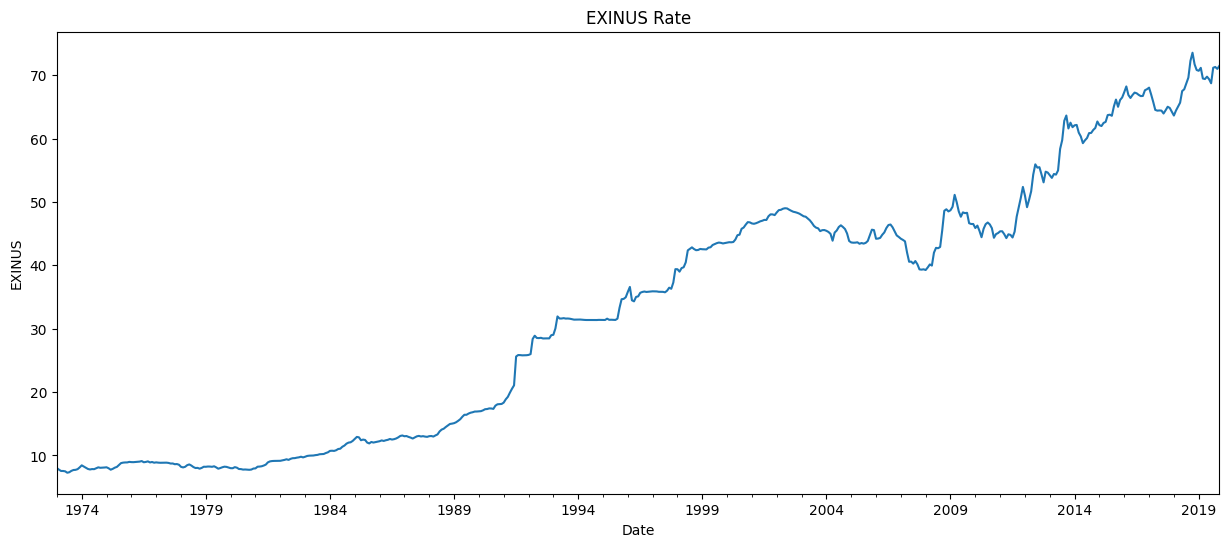

In [5]:
df["EXINUS"].plot(figsize=(15, 6))
plt.xlabel("Date")
plt.ylabel("EXINUS")
plt.title("EXINUS Rate")
plt.show()

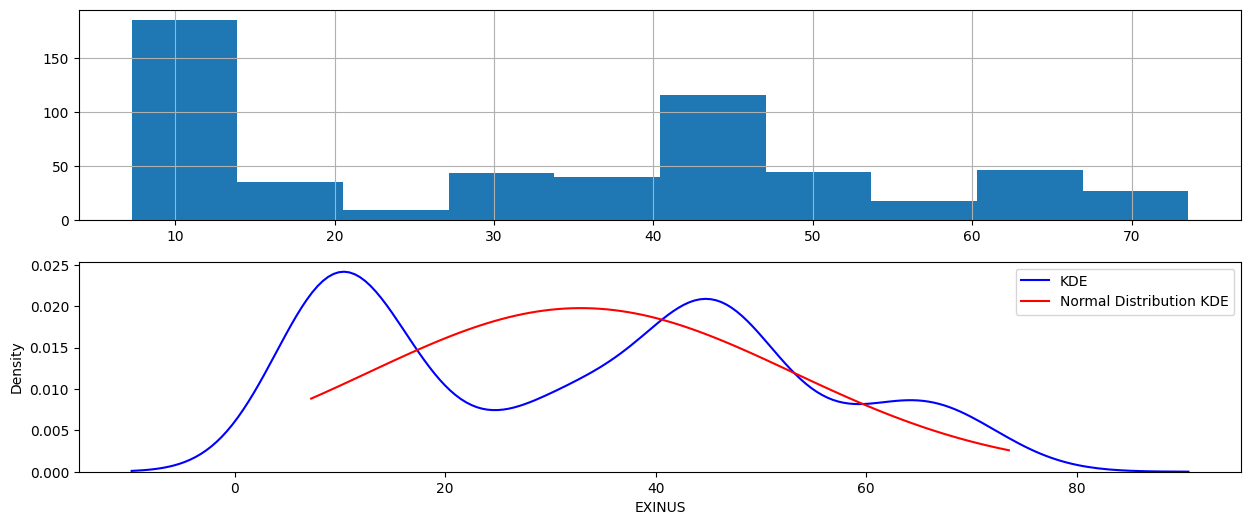

In [11]:
plt.figure(1, figsize=(15, 6))
plt.subplot(211)
df["EXINUS"].hist()
plt.subplot(212)
sns.kdeplot(df["EXINUS"], color='blue', label='KDE')

mean, std = df["EXINUS"].mean(), df["EXINUS"].std()
x = np.linspace(df["EXINUS"].min(), df["EXINUS"].max(), 100)
pdf = norm.pdf(x, loc=mean, scale=std)
plt.plot(x, pdf, color='red', label='Normal Distribution KDE')

plt.legend()
plt.show()

In [12]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

    if dftest[1] <= 0.05:
        print("Conclusion:")
        print("Reject the null hypothesis")
        print("Data is stationary")

    else:
        print("Conclusion:")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

Augmented_Dickey_Fuller_Test_func(df["EXINUS" ], "EXINUS")

Results of Dickey-Fuller Test for column: EXINUS
Test Statistic                   0.805817
p-value                          0.991729
No Lags Used                    17.000000
Number of Observations Used    545.000000
Critical Value (1%)             -3.442406
Critical Value (5%)             -2.866858
Critical Value (10%)            -2.569602
dtype: float64
Conclusion:
Fail to reject the null hypothesis
Data is non-stationary


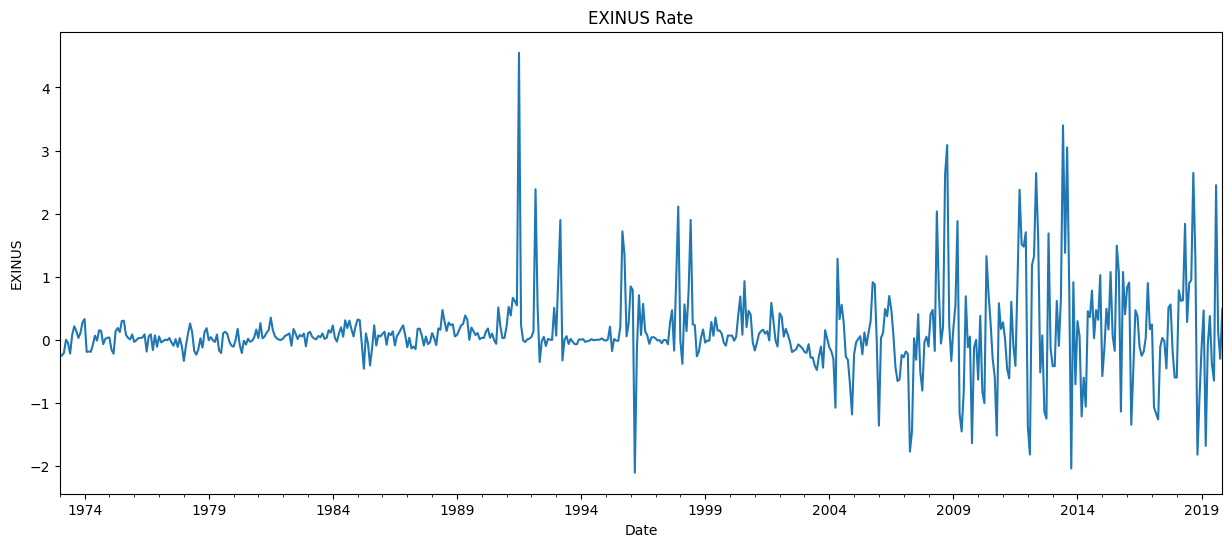

In [14]:
df["EXINUS"].diff(1).plot(figsize=(15, 6))
plt.xlabel("Date")
plt.ylabel("EXINUS")
plt.title("EXINUS Rate")
plt.show()

<Figure size 1200x400 with 0 Axes>

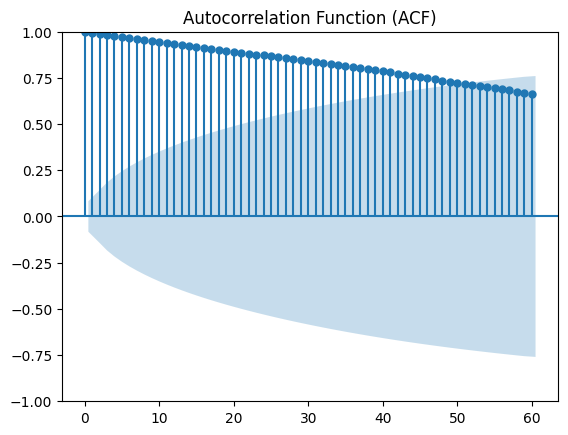

<Figure size 1200x400 with 0 Axes>

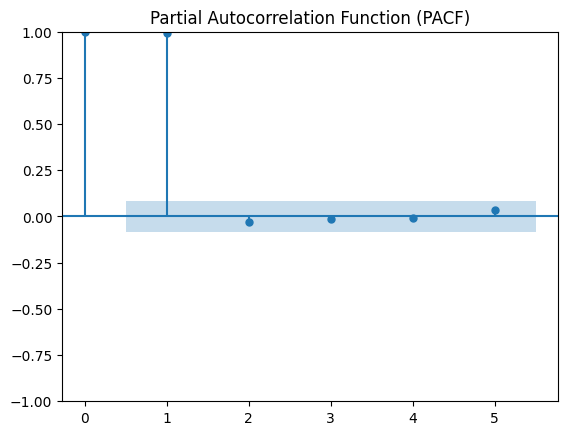

In [26]:
plt.figure(figsize=(12, 4))
plot_acf(df["EXINUS"], lags=60, title='Autocorrelation Function (ACF)')
plt.show()

plt.figure(figsize=(12, 4))
plot_pacf(df["EXINUS"], lags=5, title='Partial Autocorrelation Function (PACF)')
plt.show()

In [28]:
X = df["EXINUS"]
train, test = X[0:-30], X[-30:]

stepwise_model = auto_arima(train, start_p=1, start_q=1, max_p=10, max_q=60, seasonal=False, d=None, trace=True , error_action='ignore', suppress_warnings=True, stepwise=True)

stepwise_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=969.985, Time=0.65 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1016.525, Time=0.25 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=972.898, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=968.713, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1029.544, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=970.417, Time=0.40 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=970.336, Time=1.44 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=976.129, Time=0.19 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 3.745 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  533
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -481.357
Date:                Thu, 02 Nov 2023   AIC                            968.713
Time:                        03:54:56   BIC                            981.543
Sample:                    01-01-1973   HQIC                           973.734
                         - 05-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1060      0.038      2.768      0.006       0.031       0.181
ma.L1          0.3201      0.027     11.673      0.000       0.266       0.374
sigma2         0.3575      0.010     35.929      0.000       0.338       0.377
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              2461.85
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):              37.34   Skew:                             1.52
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
def TS_Evaluation(y_true, y_pred):

    def Mean_Absolute_Percentage_Error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {Mean_Absolute_Percentage_Error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

forecast, conf_int = stepwise_model.predict(n_periods=30, return_conf_int=True)
forecast = pd.DataFrame(forecast, columns=["EXINUS PRED"])

TS_Evaluation(test, forecast)

Evaluation metric results:-
MSE is : 9.828179552294674
MAE is : 2.4903453810770126
RMSE is : 3.1349927515537694
MAPE is : 4.662199759386909
R2 is : -0.06869548210007648



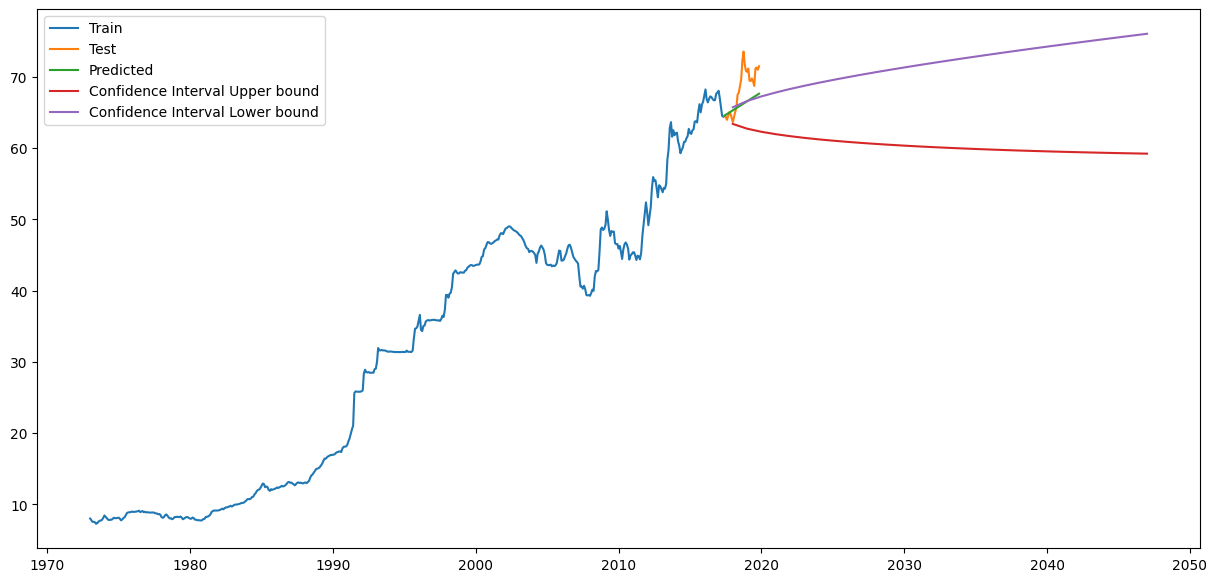

In [42]:
df_conf = pd.DataFrame(conf_int, columns=["Upper_bound", "Lower_bound"])
last_date = df.index[-30]
date_range = pd.date_range(start=last_date, periods=30, freq='Y')
df_conf.index = date_range

plt.rcParams["figure.figsize"] = [15,7]
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Predicted')
plt.plot(df_conf['Upper_bound'], label='Confidence Interval Upper bound')
plt.plot(df_conf['Lower_bound'], label='Confidence Interval Lower bound')
plt.legend(loc='best')
plt.show()

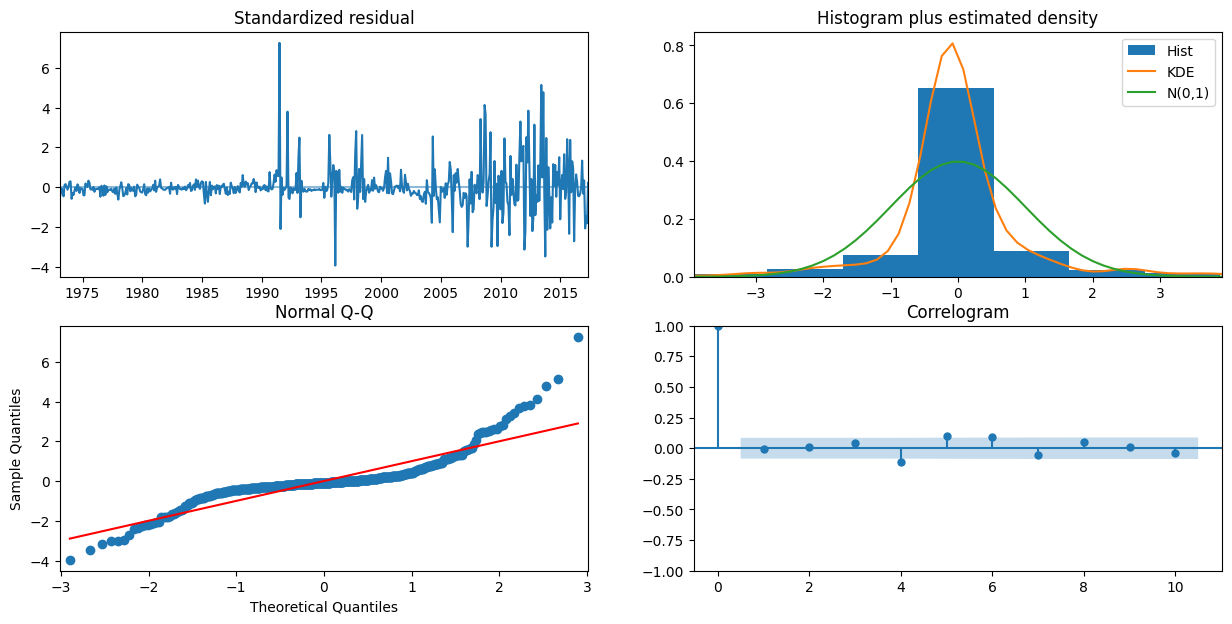

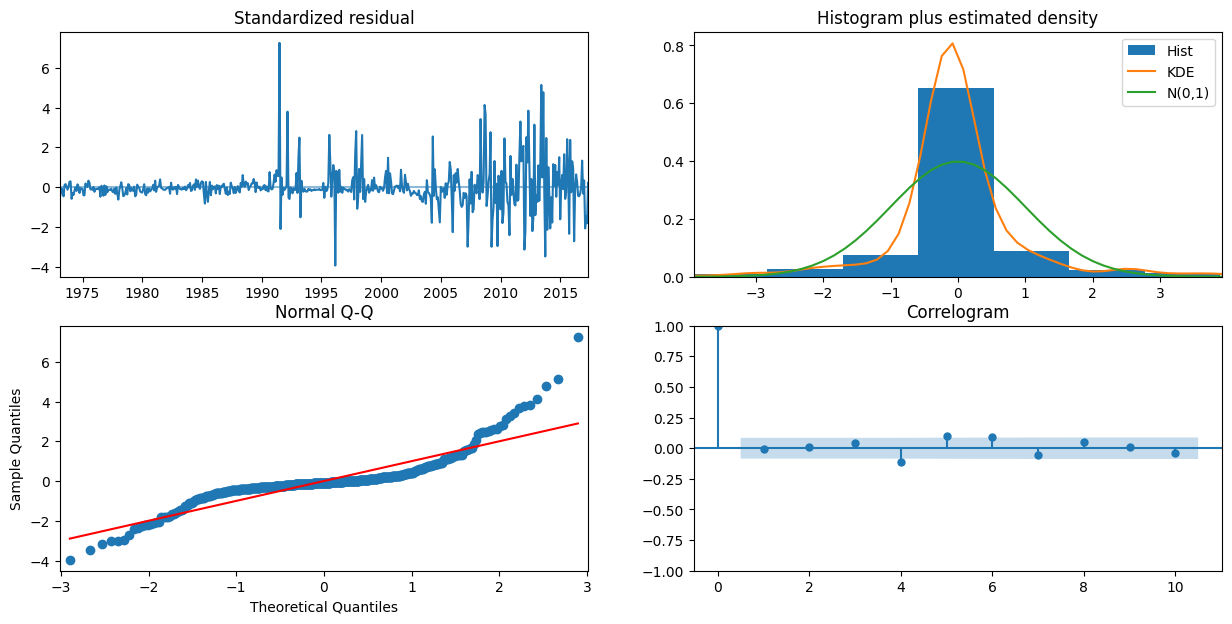

In [43]:
stepwise_model.plot_diagnostics()

In [44]:
forecast

,EXINUS PRED
2017-06-01,64.565869
2017-07-01,64.671824
2017-08-01,64.777780
2017-09-01,64.883735
2017-10-01,64.989691
2017-11-01,65.095647
2017-12-01,65.201602
2018-01-01,65.307558
2018-02-01,65.413513
2018-03-01,65.519469
